In [108]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
import scipy.signal

The PFB lets us use a window function longer than one FFT frame: the window is num_taps * fft_size. This gives us improved out of channel response and sharper filter features.

Consider a $2^{14}$ length FFT with a Hamming window

In [110]:
nfft=2**14
window = scipy.signal.hamming(nfft)

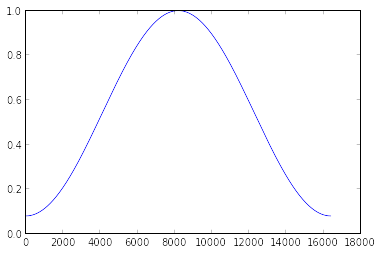

In [111]:
plot(window)

In [112]:
factor = 64
fwin = np.abs(np.fft.fftshift(np.fft.fft(window,window.shape[0]*factor)))
freq = np.arange(-len(fwin)/2,len(fwin)/2)/(1.*len(fwin))
df = 64*(freq[1]-freq[0])

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


-0.65625


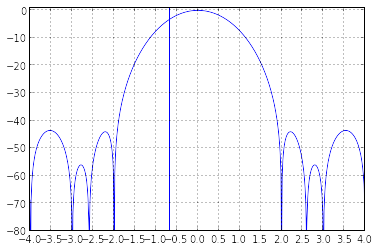

In [113]:
plot(freq/df,20*np.log10(fwin/fwin.max()))
xlim(-4,4.)
ylim(-80,1)
f3db = freq[np.argmin(np.abs(20*np.log10(fwin/fwin.max())+3))]
ax = gca()
ax.axvline(f3db/df)
print f3db/df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)


Now consider a 16 tap PFB version. The window is 16 times longer, but the channel is the same width

In [114]:
ntap = 16
pfb_window = scipy.signal.hamming(nfft*ntap)

In [115]:
factor = 64
pfb_fwin = np.abs(np.fft.fftshift(np.fft.fft(pfb_window,pfb_window.shape[0]*factor)))
pfb_freq = np.arange(-len(pfb_fwin)/2,len(pfb_fwin)/2)/(1.*len(pfb_fwin))
pfb_df = 64*(freq[1]-freq[0])

pfb 3dB point: -0.041015625


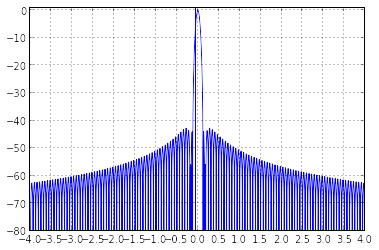

In [116]:
plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()))
xlim(-4,4.)
ylim(-80,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_fwin/pfb_fwin.max())+3))]
ax = gca()
ax.axvline(pfb_f3db/pfb_df)
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


fft 3 dB point: -0.65625
pfb 3dB point: -0.041015625


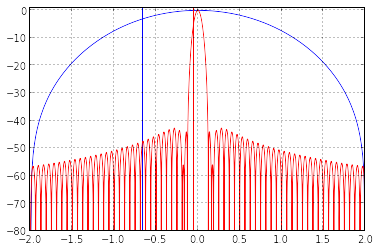

In [117]:
plot(freq/df,20*np.log10(fwin/fwin.max()))
f3db = freq[np.argmin(np.abs(20*np.log10(fwin/fwin.max())+3))]
ax = gca()
ax.axvline(f3db/df)
print "fft 3 dB point:", f3db/df

plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()),color='r')
xlim(-2,2.)
ylim(-80,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_fwin/pfb_fwin.max())+3))]
ax.axvline(pfb_f3db/pfb_df,color='r')
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

The window is much narrower than a bin, so we want to stretch it out to better fill the bin. We do this by multiplying by a sinc window, which is the same as convolving in the frequency domain.

In [118]:
sinc_window = np.sinc(np.arange(nfft*ntap)/(1.*nfft) - ntap/2.)  # the argument to the sinc window is -ntap/2 to ntap/2

In the time domain this looks like:

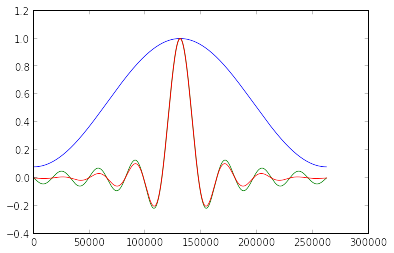

In [119]:
plot(pfb_window)
plot(sinc_window)
plot(pfb_window*sinc_window)

and in the frequency domain:

In [120]:
pfb_fsinc = np.abs(np.fft.fftshift(np.fft.fft(sinc_window,sinc_window.shape[0]*factor)))
pfb_ftotal = np.abs(np.fft.fftshift(np.fft.fft(pfb_window*sinc_window,sinc_window.shape[0]*factor)))

pfb 3dB point: -0.474609375


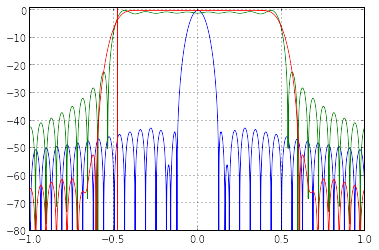

In [121]:
#plot(freq/df,20*np.log10(fwin/fwin.max()))
#f3db = freq[np.argmin(np.abs(20*np.log10(fwin/fwin.max())+3))]
ax = gca()
#ax.axvline(f3db/df)
#print "fft 3 dB point:", f3db/df

plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()),color='b')
plot(pfb_freq/pfb_df,20*np.log10(pfb_fsinc/pfb_fsinc.max()),color='g')
plot(pfb_freq/pfb_df,20*np.log10(pfb_ftotal/pfb_ftotal.max()),color='r')
xlim(-1,1.)
ylim(-80,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_ftotal/pfb_ftotal.max())+3))]
ax.axvline(pfb_f3db/pfb_df,color='r')
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


fft 3 dB point: -0.65625
pfb 3dB point: -0.474609375


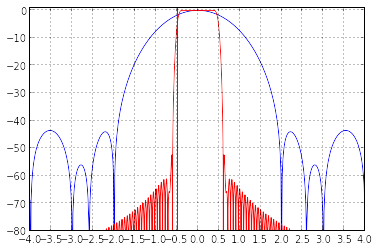

In [122]:
plot(freq/df,20*np.log10(fwin/fwin.max()))
f3db = freq[np.argmin(np.abs(20*np.log10(fwin/fwin.max())+3))]
ax = gca()
#ax.axvline(f3db/df)
print "fft 3 dB point:", f3db/df

#plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()),color='b')
#plot(pfb_freq/pfb_df,20*np.log10(pfb_fsinc/pfb_fsinc.max()),color='g')
plot(pfb_freq/pfb_df,20*np.log10(pfb_ftotal/pfb_ftotal.max()),color='r')
xlim(-4,4.)
ylim(-80,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_ftotal/pfb_ftotal.max())+3))]
ax.axvline(pfb_f3db/pfb_df,color='r')
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

In [123]:
ntap = 2
pfb_window = scipy.signal.flattop(nfft*ntap)

In [124]:
factor = 64
pfb_fwin = np.abs(np.fft.fftshift(np.fft.fft(pfb_window,pfb_window.shape[0]*factor)))
pfb_freq = np.arange(-len(pfb_fwin)/2,len(pfb_fwin)/2)/(1.*len(pfb_fwin))
pfb_df = 64*(freq[1]-freq[0])

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


pfb 3dB point: -0.9296875


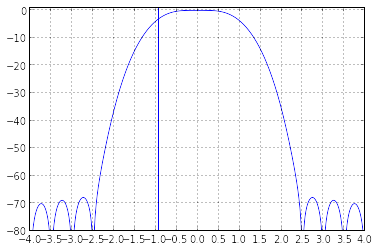

In [125]:
plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()))
xlim(-4,4.)
ylim(-80,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_fwin/pfb_fwin.max())+3))]
ax = gca()
ax.axvline(pfb_f3db/pfb_df)
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

In [126]:
sinc_window = np.sinc(np.arange(nfft*ntap)/(1.*nfft) - ntap/2.)  # the argument to the sinc window is -ntap/2 to ntap/2

In [127]:
pfb_fsinc = np.abs(np.fft.fftshift(np.fft.fft(sinc_window,sinc_window.shape[0]*factor)))
pfb_ftotal = np.abs(np.fft.fftshift(np.fft.fft(pfb_window*sinc_window,sinc_window.shape[0]*factor)))

pfb 3dB point: 0.890625


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


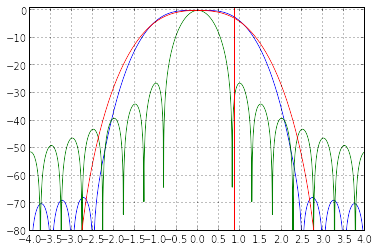

In [128]:
#plot(freq/df,20*np.log10(fwin/fwin.max()))
#f3db = freq[np.argmin(np.abs(20*np.log10(fwin/fwin.max())+3))]
ax = gca()
#ax.axvline(f3db/df)
#print "fft 3 dB point:", f3db/df

plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()),color='b')
plot(pfb_freq/pfb_df,20*np.log10(pfb_fsinc/pfb_fsinc.max()),color='g')
plot(pfb_freq/pfb_df,20*np.log10(pfb_ftotal/pfb_ftotal.max()),color='r')
xlim(-4,4.)
ylim(-80,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_ftotal/pfb_ftotal.max())+3))]
ax.axvline(pfb_f3db/pfb_df,color='r')
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

In [152]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/readout/kid_readout/kid_readout/roach/heterodyne.py'>

In [153]:
dlator = kid_readout.roach.heterodyne.Demodulator()

(-80, 1)

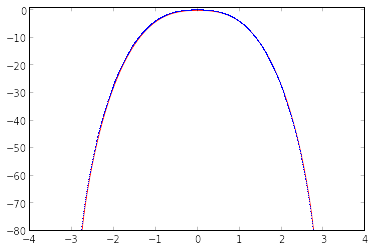

In [162]:
plot(pfb_freq/pfb_df,20*np.log10(pfb_ftotal/pfb_ftotal.max()),color='r')
plot(dlator._window_frequency,20*np.log10(dlator._window_response),',')
xlim(-4,4.)
ylim(-80,1)


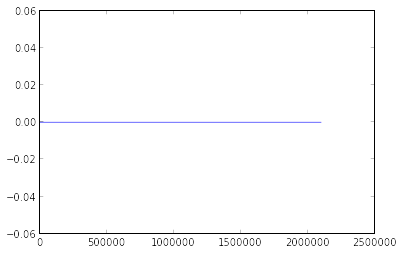

In [161]:
plot(pfb_freq/pfb_df-dlator._window_frequency)

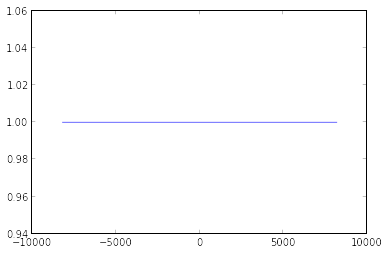

In [159]:
plot(dlator._window_frequency,(pfb_ftotal/pfb_ftotal.max())/(dlator._window_response))

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


fft 3 dB point: -0.65625
pfb 3dB point: 0.890625


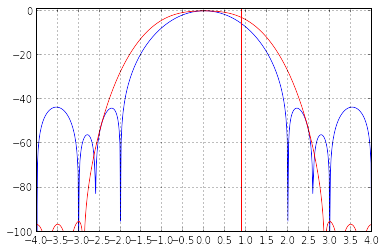

In [129]:
plot(freq/df,20*np.log10(fwin/fwin.max()))
f3db = freq[np.argmin(np.abs(20*np.log10(fwin/fwin.max())+3))]
ax = gca()
#ax.axvline(f3db/df)
print "fft 3 dB point:", f3db/df

#plot(pfb_freq/pfb_df,20*np.log10(pfb_fwin/pfb_fwin.max()),color='b')
#plot(pfb_freq/pfb_df,20*np.log10(pfb_fsinc/pfb_fsinc.max()),color='g')
plot(pfb_freq/pfb_df,20*np.log10(pfb_ftotal/pfb_ftotal.max()),color='r')
xlim(-4,4.)
ylim(-100,1)
pfb_f3db = pfb_freq[np.argmin(np.abs(20*np.log10(pfb_ftotal/pfb_ftotal.max())+3))]
ax.axvline(pfb_f3db/pfb_df,color='r')
print "pfb 3dB point:", pfb_f3db/pfb_df

ax.xaxis.set_major_locator(MultipleLocator(0.5))
grid(lw=1)

(0.8, 1.02)

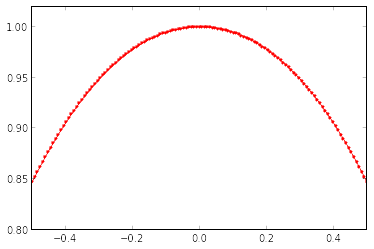

In [130]:
plot(pfb_freq/pfb_df,(pfb_ftotal/pfb_ftotal.max())**2,'.-',color='r')
xlim(-.5,.5)
ylim(0.8,1.02)

In [131]:
pfb_freq = np.arange(-len(pfb_fwin)/2,len(pfb_fwin)/2)/(1.*len(pfb_fwin))
pfb_df = factor*(freq[1]-freq[0])

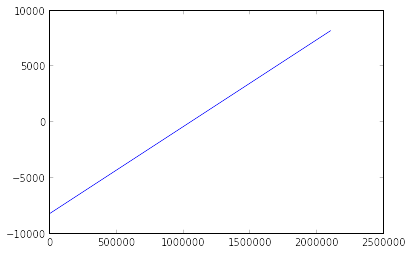

In [132]:
plot(pfb_freq/pfb_df)

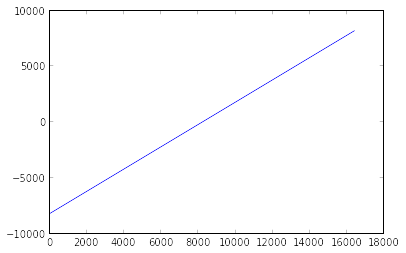

In [133]:
plot(np.arange(-2**13,2**13))